<a href="https://colab.research.google.com/github/bhanupratap123/Basics/blob/master/Fake_Album_Cover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import **Libraries**

In [0]:
from IPython.display import Image as IPythonImage
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

In [13]:
!wget -O "album_art_raw.png" "https://drive.google.com/open?id=1PyHULM_uxjhG05wDq0Msn_obS4uqbQcH"

--2019-06-05 02:01:49--  https://drive.google.com/open?id=1PyHULM_uxjhG05wDq0Msn_obS4uqbQcH
Resolving drive.google.com (drive.google.com)... 74.125.142.139, 74.125.142.100, 74.125.142.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 307 OK
Location: https://drive.google.com/file/d/1PyHULM_uxjhG05wDq0Msn_obS4uqbQcH/view?usp=drive_open [following]
--2019-06-05 02:01:49--  https://drive.google.com/file/d/1PyHULM_uxjhG05wDq0Msn_obS4uqbQcH/view?usp=drive_open
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘album_art_raw.png’

album_art_raw.png       [ <=>                ] 120.31K  --.-KB/s    in 0.05s   

2019-06-05 02:01:49 (2.35 MB/s) - ‘album_art_raw.png’ saved [123195]



In [0]:
def display_cover(top,bottom):
    """This function
    """
    import requests
    
    name = 'album_art_raw.png'
    # Now let's make get an album cover.
    # https://picsum.photos/ is a free service that offers random images.
    # Let's get a random image:
    album_art_raw = requests.get('https://picsum.photos/500/500/?random')
    # and save it as 'album_art_raw.png'
    with open(name,'wb') as album_art_raw_file:
       album_art_raw_file.write(album_art_raw.content)
    # Now that we have our raw image, let's open it 
    # and write our band and album name on it
    img = Image.open("album_art_raw.png")
    draw = ImageDraw.Draw(img)

    # the x,y coordinates for where our album name and band name text will start
    # counted from the top left of the picture (in pixels)
    band_x, band_y = 220, 50
    album_x, album_y = 220, 400

    # Our text should be visible on any image. A good way
    # of accomplishing that is to use white text with a 
    # black border. We'll use the technique shown here to draw the border:
    # https://mail.python.org/pipermail/image-sig/2009-May/005681.html
    outline_color ="black"

    draw.text((band_x-1, band_y-1), top, fill=outline_color)
    draw.text((band_x+1, band_y-1), top, fill=outline_color)
    draw.text((band_x-1, band_y+1), top, fill=outline_color)
    draw.text((band_x+1, band_y+1), top, fill=outline_color)

    draw.text((album_x-1, album_y-1), bottom ,  fill=outline_color)
    draw.text((album_x+1, album_y-1), bottom ,  fill=outline_color)
    draw.text((album_x-1, album_y+1), bottom ,  fill=outline_color)
    draw.text((album_x+1, album_y+1), bottom ,  fill=outline_color)

    draw.text((band_x,band_y),top,(255,255,255))
    draw.text((album_x, album_y),bottom,(255,255,255))

    return img

###Use the Function display_cover:
 The function **display_cover**  selects a random image from https://picsum.photos/  and will help us superimpose two strings over the image. The parameter **top** is the string we would like to superimpose on the top of an image.The parameter bottom is the string we would like to display on the bottom of the image.

In [0]:
img=display_cover('Cover','Page')

In [0]:
img.save('sample-out.png')

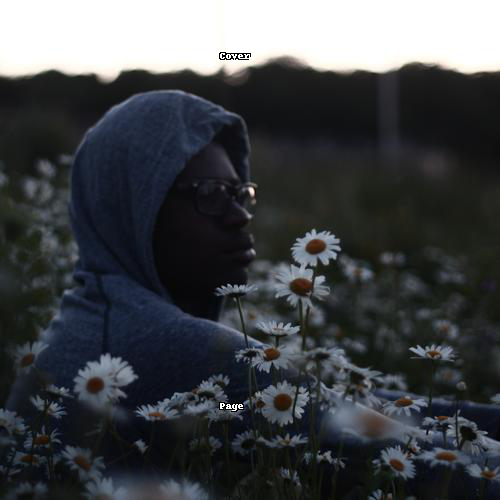

In [48]:

IPythonImage(filename='sample-out.png')

###Part 2: Loading a random page from Wikipedia

 In this project, we will use the request library, we used it in the function **display_cover**, but you should import the library in the next cell.

In [0]:
import requests

In [0]:
wikipedia_link='https://en.wikipedia.org/wiki/Special:Random'

In [0]:
#hint: requests.get()
raw_random_wikipedia_page=requests.get(wikipedia_link)

In [53]:
page = raw_random_wikipedia_page.text
print(page)

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Jan Tore Ophaug - Wikipedia</title>
<script>document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Jan_Tore_Ophaug","wgTitle":"Jan Tore Ophaug","wgCurRevisionId":837020213,"wgRevisionId":837020213,"wgArticleId":7138756,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with Danish-language external links","All stub articles","1977 births","Living people","Norwegian footballers","Odense Boldklub players","Moss FK players","SK Brann players","Norwegian expatriate footballers","Expatriate footballers in Denmark","People from Sør-Trøndelag","Fredrikstad FK players","Eliteserien players","Norwegian football defender stubs","Association football defenders"],"wgB

###Part 3: Extracting the Title of the Article:
The title of the article is surrounded by the XML node title as follows: <title>title - Wikipedia</title> . For example, if the title of the article was Python we would see the following: <title>Python - Wikipedia</title>. Consider the example where the title of the article is Teenage Mutant Ninja Turtles the result would be: <title>Teenage Mutant Ninja Turtles - Wikipedia</title>. The first step is to find the XML node <title> and </title>indicating the start and end of the title. The string function find maybe helpful, you can also use libraries like xlxml.

In [0]:
title_start=page.find('<title>')
title_end=page.find('</title>')
title=page[(title_start+7):(title_end)]
band_title=title.replace(' - Wikipedia','')

In [0]:
raw_random_wikipedia_page=requests.get(wikipedia_link)
page = raw_random_wikipedia_page.text
title_start=page.find('<title>')
title_end=page.find('</title>')
title=page[(title_start+7):(title_end)]
album_title=title.replace(' - Wikipedia','')

In [56]:
print("Your band: ", band_title)
print("Your album: ", album_title)

Your band:  Jan Tore Ophaug
Your album:  Fort St. John/Tompkins Mile 54 Airport


###Display the Album Cover

In [0]:
img=display_cover(top=band_title,bottom=album_title)

In [0]:
img.save('sample-out.png')

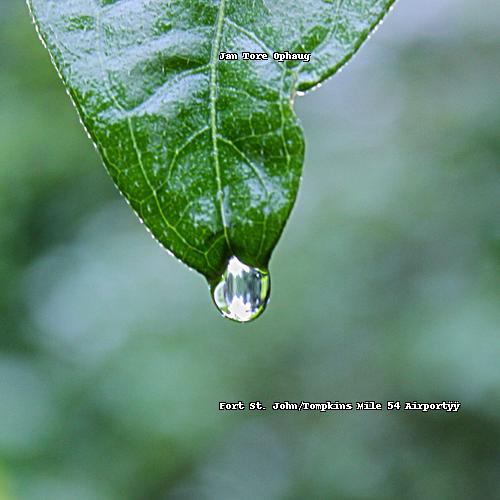

In [59]:
IPythonImage(filename='sample-out.png')